<a href="https://colab.research.google.com/github/bhermus/CSC732_hw1/blob/main/Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

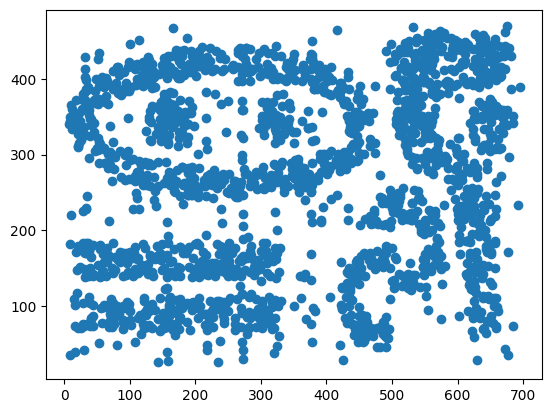

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN

df = pd.read_csv("/content/chameleon.data", comment="@",  names=["X", "y"], delimiter=" ")

plt.scatter(df.get("X"), df.get("y"))
plt.show()

Estimated number of clusters: 44
Estimated number of noise points: 400


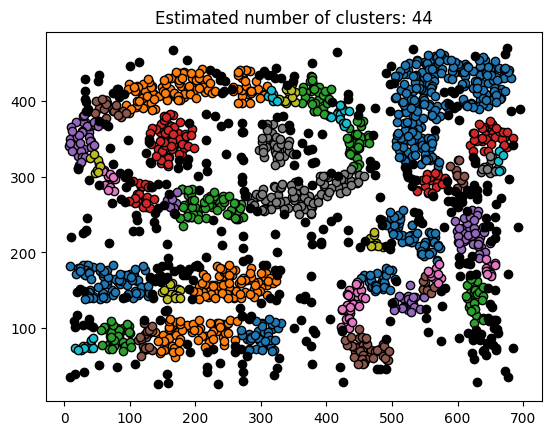

In [5]:
dbscan = DBSCAN(eps=15, min_samples=10)  # DBSCAN parameters set here
dbscan.fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Estimated number of clusters: 10
Estimated number of noise points: 135


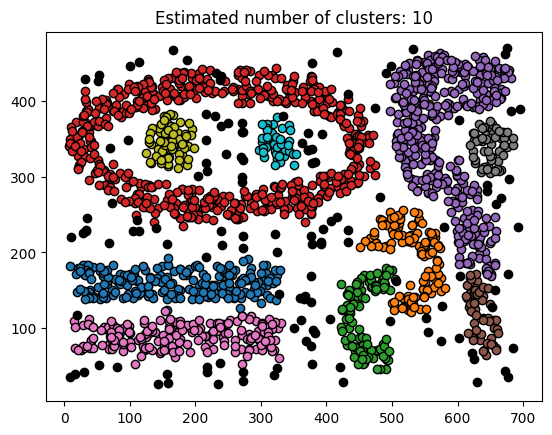

In [7]:
dbscan = DBSCAN(eps=15, min_samples=5)  # DBSCAN parameters set here
dbscan.fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

Estimated number of clusters: 5
Estimated number of noise points: 77


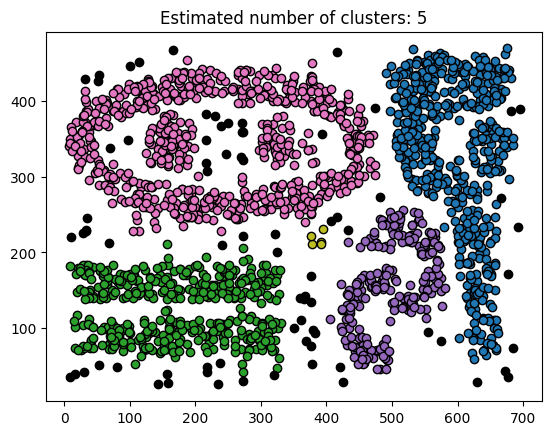

In [8]:
dbscan = DBSCAN(eps=20, min_samples=5)  # DBSCAN parameters set here
dbscan.fit(df)

labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:370: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:681: RuntimeWarning: overflow encountered in square
  lloyd_iter(
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return

Estimated number of clusters: 1


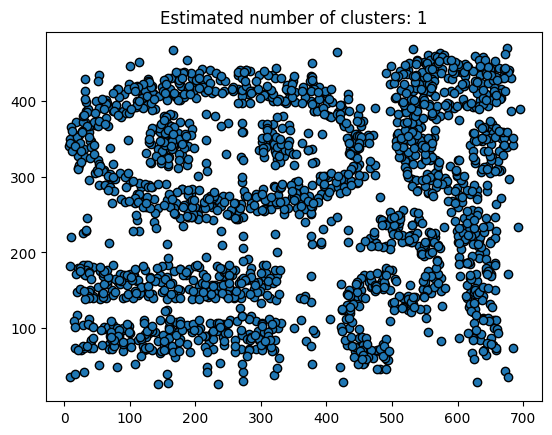

In [39]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(gamma=100, n_clusters=10, affinity='rbf')
labels = spectral_clustering.fit_predict(df)

# Number of clusters in labels
n_clusters_ = len(set(labels))

print("Estimated number of clusters: %d" % n_clusters_)

unique_labels = set(labels)

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = df[class_member_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:370: RuntimeWarning: invalid value encountered in add
  distances += XX


Estimated number of clusters: 1


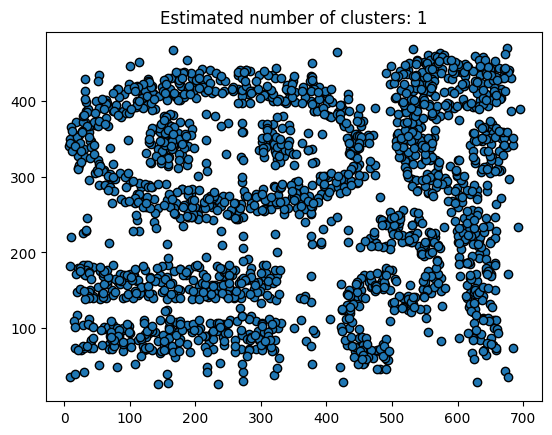

In [46]:
spectral_clustering = SpectralClustering(gamma=100, n_clusters=1, random_state=42)
labels = spectral_clustering.fit_predict(df)

# Number of clusters in labels
n_clusters_ = len(set(labels))

print("Estimated number of clusters: %d" % n_clusters_)

unique_labels = set(labels)

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = df[class_member_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Estimated number of clusters: 10


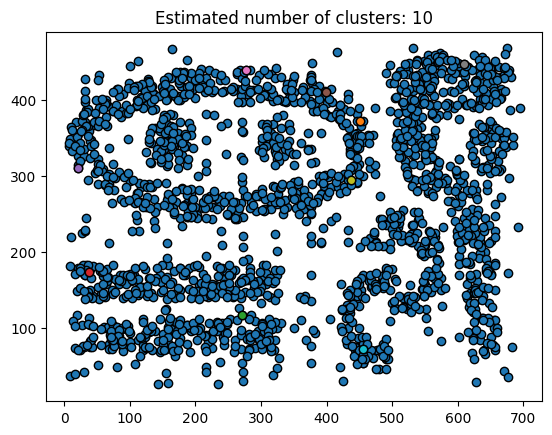

In [62]:
spectral_clustering = SpectralClustering(gamma=8000, n_clusters=10, random_state=42)
labels = spectral_clustering.fit_predict(df)

# Number of clusters in labels
n_clusters_ = len(set(labels))

print("Estimated number of clusters: %d" % n_clusters_)

unique_labels = set(labels)

colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    class_member_mask = labels == k

    xy = df[class_member_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

In [67]:
spectral_clustering = SpectralClustering(gamma=8000, n_clusters=10, random_state=42)
labels = spectral_clustering.fit(df)

# Number of clusters in labels
n_clusters_ = 10
print("Estimated number of clusters: %d" % n_clusters_)

unique_labels = 10

colors = [plt.cm.tab10(each) for each in range(10)]
for k, col in zip(range(10), colors):
    class_member_mask = labels == k

    xy = df[class_member_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Estimated number of clusters: 10


KeyError: False

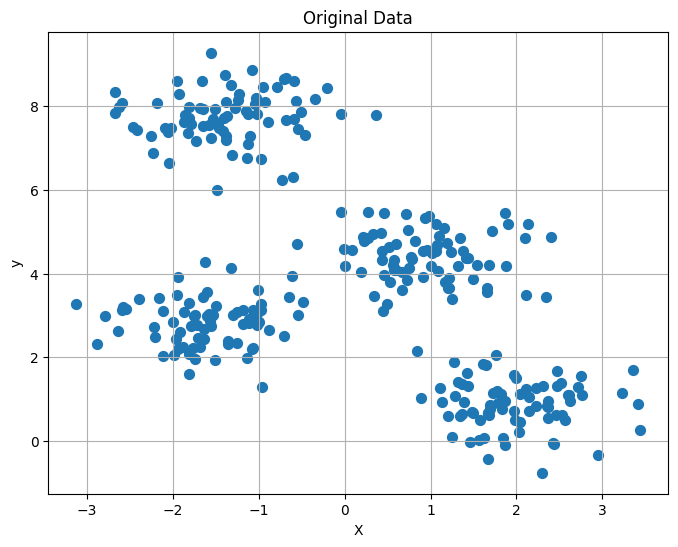

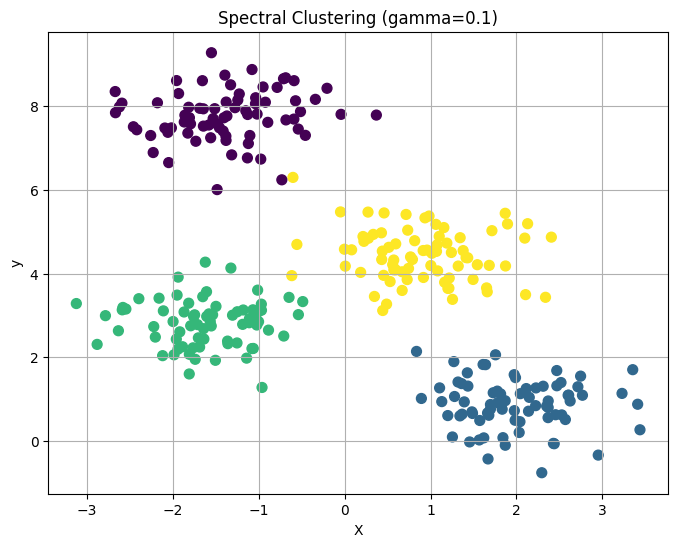

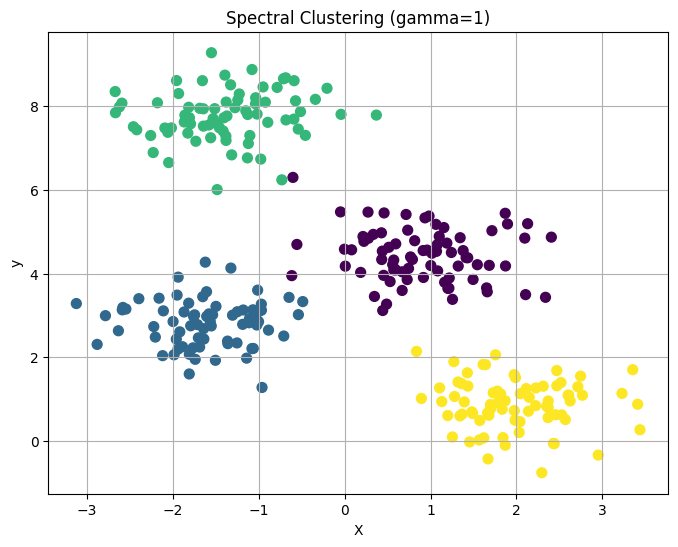

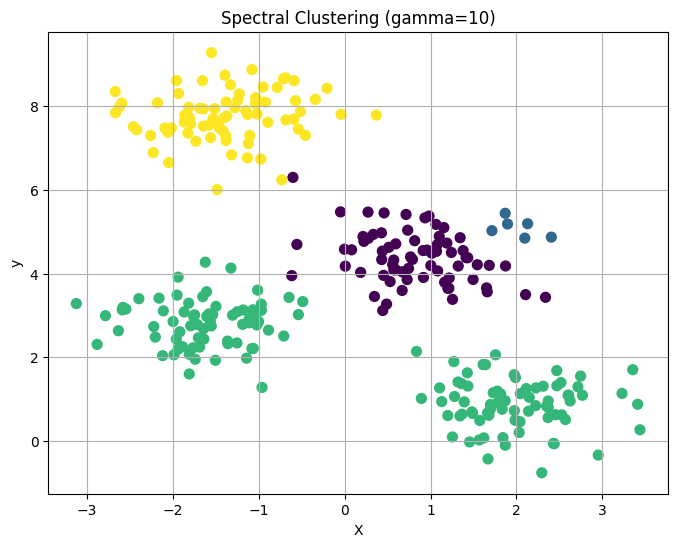

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[2.88050989e-13 1.58054865e-06 5.13959987e-06 1.91913743e-06
 2.31248130e-05]
not reaching the requested tolerance 4.470348358154297e-06.
Use iteration 1879 instead with accuracy 
3.6265081014648817e-06.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[4.22287081e-14 1.19460417e-06 6.73729899e-06 1.26418314e-06
 8.93801456e-06]
not reaching the requested tolerance 4.470348358154297e-06.
  _, diffusion_map = lobpcg(


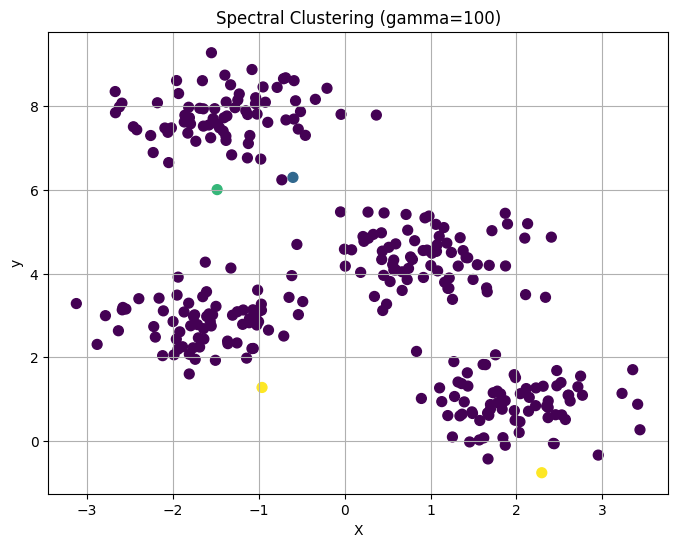

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs

# Generating sample data
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
# df = pd.DataFrame(X, columns=['X', 'y'])
df = pd.read_csv("/content/chameleon.data", comment="@",  names=["X", "y"], delimiter=" ")

# Plotting original data
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['y'], s=50)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Experimenting with different gamma values for Spectral Clustering
gamma_values = [0.1, 1, 10, 100]

for gamma in gamma_values:
    # Performing Spectral Clustering
    spectral_clustering = SpectralClustering(n_clusters=4, gamma=gamma, affinity='rbf', random_state=0)
    df['cluster_label'] = spectral_clustering.fit_predict(df)

    # Plotting clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(df['X'], df['y'], c=df['cluster_label'], s=50, cmap='viridis')
    plt.title(f"Spectral Clustering (gamma={gamma})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()


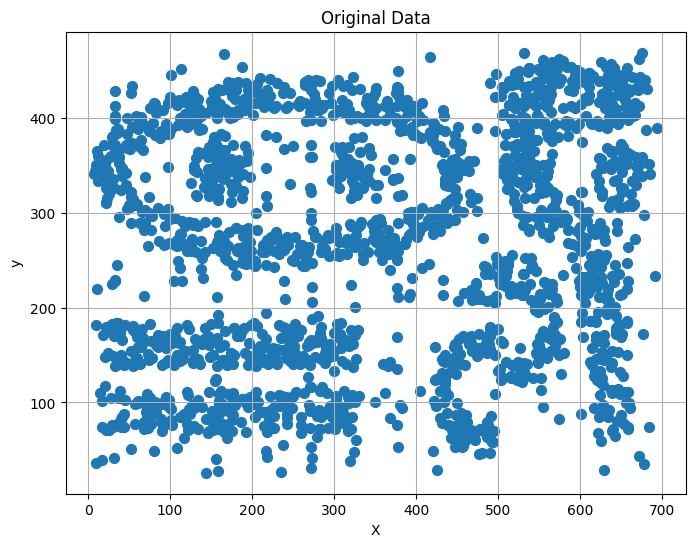

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:370: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:681: RuntimeWarning: overflow encountered in square
  lloyd_iter(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (1

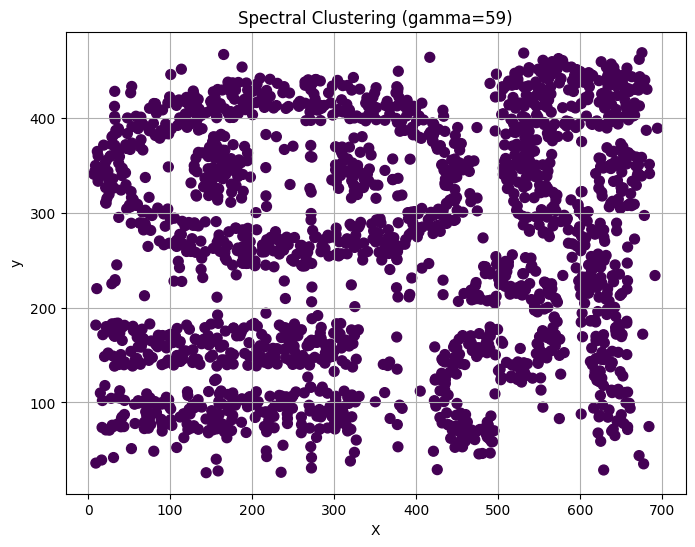

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

# Load data from CSV file
df = pd.read_csv("/content/chameleon.data", comment="@", names=["X", "y"], delimiter=" ")

# Plotting original data
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['y'], s=50)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Experimenting with different gamma values for Spectral Clustering
gamma_values = [59]

for gamma in gamma_values:
    # Performing Spectral Clustering
    spectral_clustering = SpectralClustering(n_clusters=4, gamma=gamma, affinity='rbf', random_state=0)
    df['cluster_label'] = spectral_clustering.fit_predict(df[['X', 'y']])

    # Plotting clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(df['X'], df['y'], c=df['cluster_label'], s=50, cmap='viridis')
    plt.title(f"Spectral Clustering (gamma={gamma})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

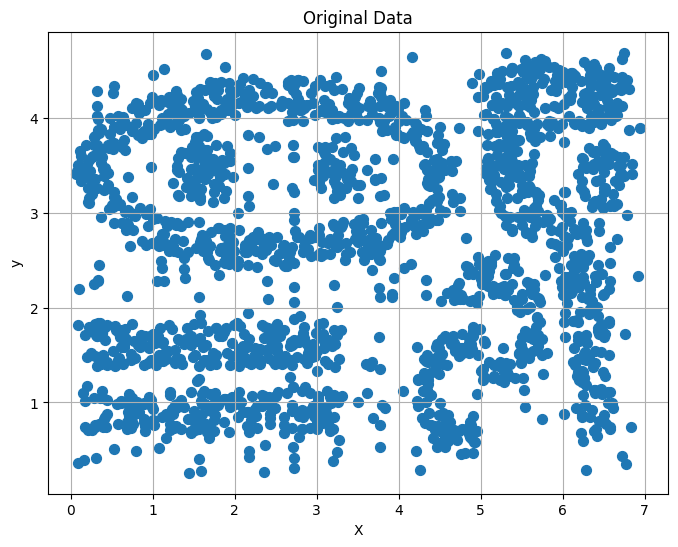

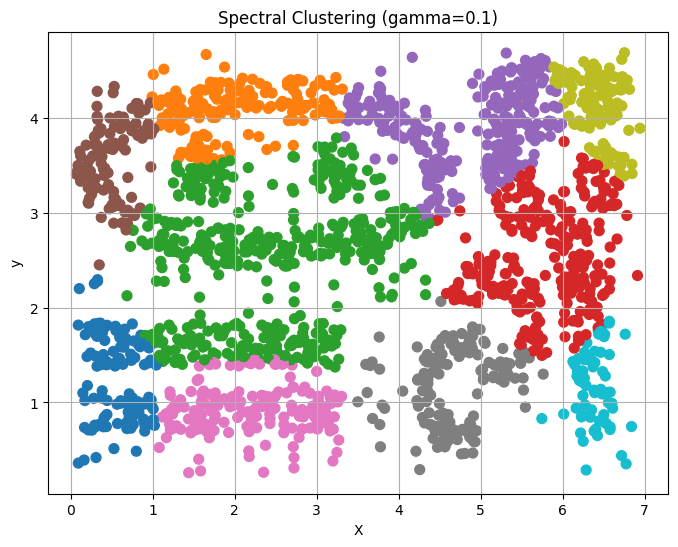

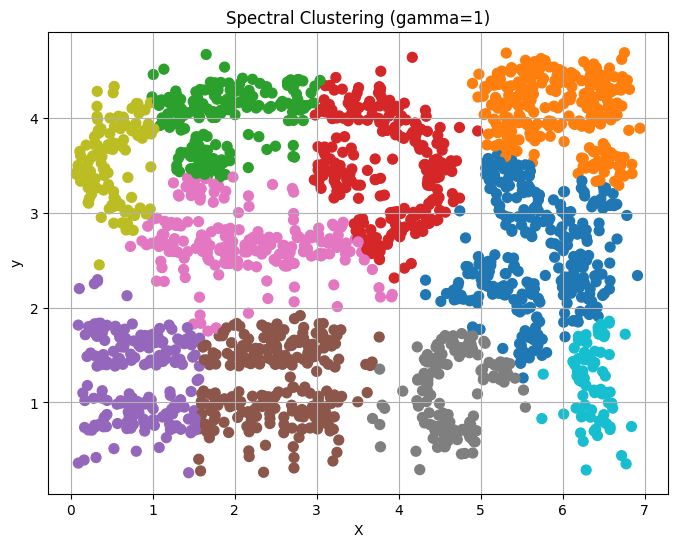

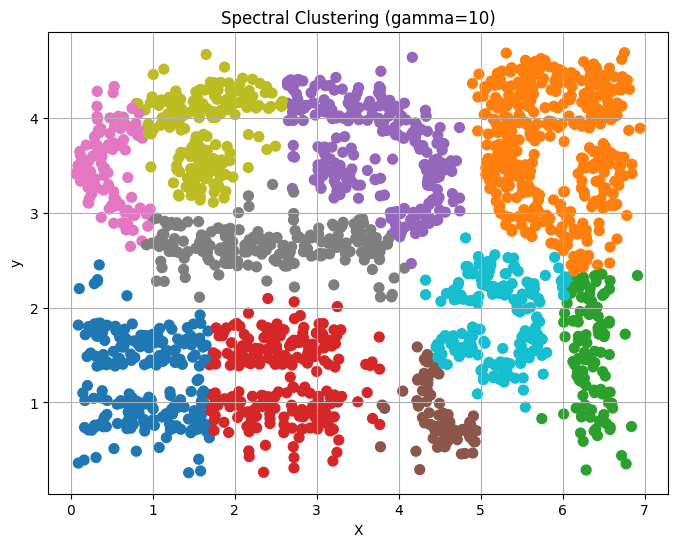

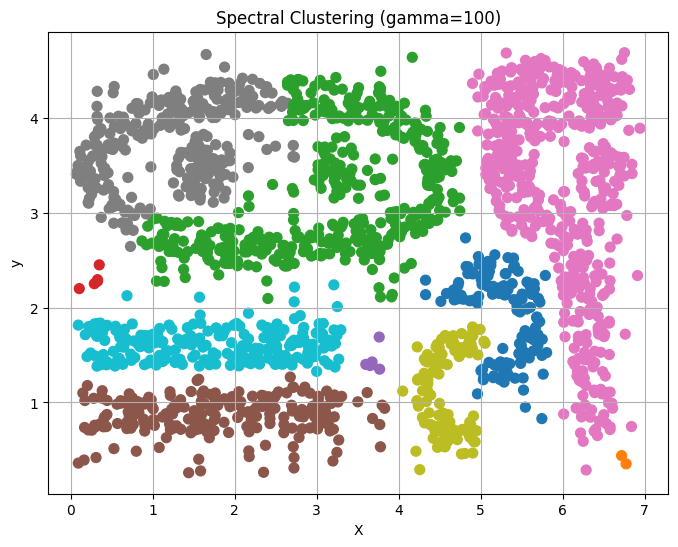

In [97]:
df = pd.read_csv("/content/chameleon.data", comment="@",  names=["X", "y"], delimiter=" ")

df = df.div(100)

# Plotting original data
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['y'], s=50)
plt.title("Original Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

# Experimenting with different gamma values for Spectral Clustering
gamma_values = [0.1, 1, 10, 100]

for gamma in gamma_values:
    df_ = df.copy(deep=True)
    # Performing Spectral Clustering
    spectral_clustering = SpectralClustering(n_clusters=10, gamma=gamma, affinity='rbf', random_state=0)
    df_['cluster_label'] = spectral_clustering.fit_predict(df_)

    # labels = df['cluster_label'].

    # Plotting clustered data
    plt.figure(figsize=(8, 6))
    plt.scatter(df_['X'], df_['y'], c=df_['cluster_label'], s=50, cmap='tab10')
    plt.title(f"Spectral Clustering (gamma={gamma})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()